### Pandas의 시각화 기능

Pandas의 시리즈나 데이터프레임은 plot이라는 시각화 메서드를 내장하고 있다.
plot은 matplotlib를 내부에서 임포트하여 사용한다.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import koreanize_matplotlib

In [6]:
np.random.seed(0)
df1 = pd.DataFrame(np.random.randn(100, 3), # 평균0 표준편차1을 가지는 표준정규분포 내에서 임의 추출, 100행 3열
                   index=pd.date_range('1/1/2018', periods=100),
                   columns=['A', 'B', 'C']).cumsum() # cumsum은 배열에서 주어진 축에 따라 누적되는 원소들의 누적합을 계산
df1.tail()

,A,B,C
2018-04-06,9.396256,6.282026,-11.198087
2018-04-07,10.086074,7.583872,-11.826175
2018-04-08,9.605047,9.887789,-12.886190
2018-04-09,9.469097,11.024680,-12.788465
2018-04-10,10.052051,10.625231,-12.418409


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2018-01-01 to 2018-04-10
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       100 non-null    float64
 1   B       100 non-null    float64
 2   C       100 non-null    float64
dtypes: float64(3)
memory usage: 3.1 KB


<Axes: >

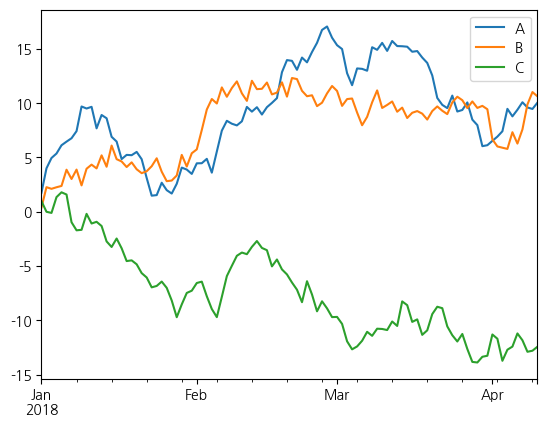

In [8]:
df1.plot()

In [10]:
# 직접 스타일 인자를 넣을 수도 있음
df1.plot?

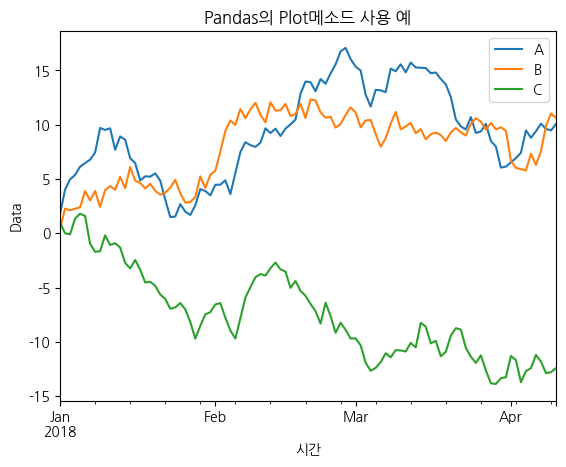

In [11]:
df1.plot()
plt.title("Pandas의 Plot메소드 사용 예")
plt.xlabel("시간")
plt.ylabel("Data")
plt.show()

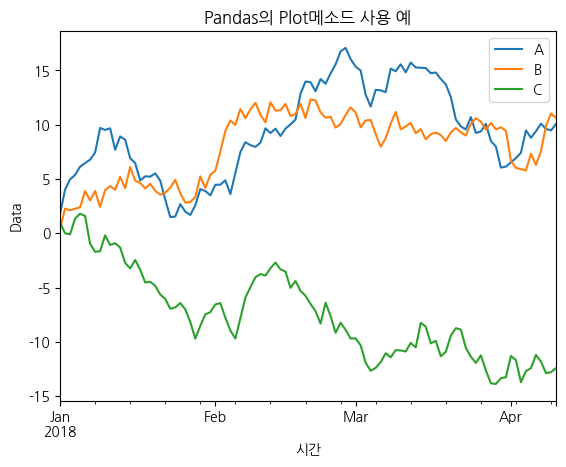

In [15]:
# 판다스 플롯 사용하기
df1.plot(title="Pandas의 Plot메소드 사용 예", xlabel="시간", ylabel="Data")
plt.show()

plot 메서드의 kind라는 인수를 바꾸면 여러가지 플롯을 그릴 수 있다. 다음과 같은 인수값을 지원한다.

* bar
* pie
* hist
* kde
* box
* scatter
* area

In [16]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터

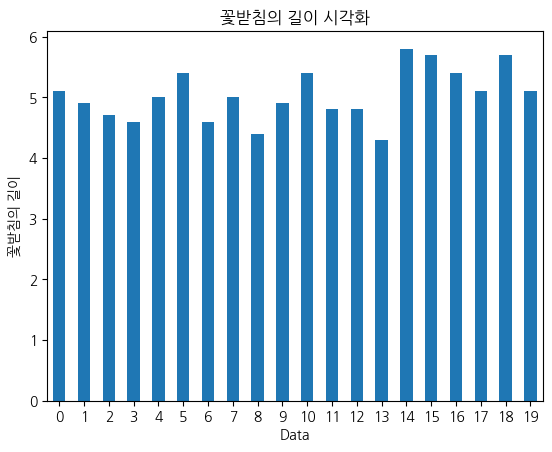

In [17]:
iris.sepal_length[:20].plot(kind='bar', rot=0) # rot은 xtick 각도
plt.title("꽃받침의 길이 시각화")
plt.xlabel("Data")
plt.ylabel("꽃받침의 길이")
plt.show()

kind 인수에 문자열을 쓰는 대신 plot.bar처럼 직접 메서드로 사용할 수도 있다.

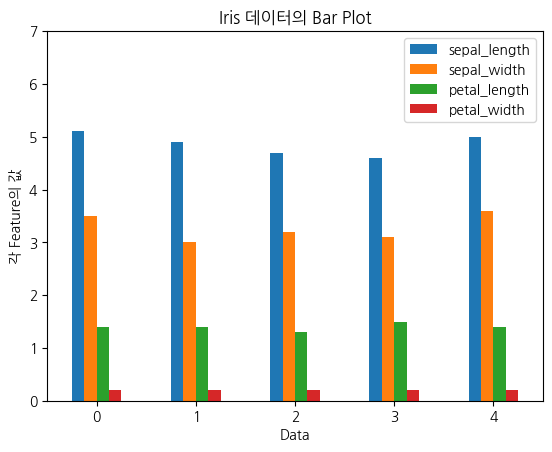

In [18]:
iris[:5].plot.bar(rot=0)
plt.title("Iris 데이터의 Bar Plot")
plt.xlabel("Data")
plt.ylabel("각 Feature의 값")
plt.ylim(0, 7)
plt.show()

다음은 그룹분석으로 각 붓꽃종의 특징값의 평균을 구한 것이다.

In [19]:
df2 = iris.groupby(iris.species).mean()
df2.columns.name = "feature"
df2

feature,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


그룹분석 결과도 데이터프레임이므로 같은 방식으로 시각화할 수 있다.

<Axes: xlabel='species'>

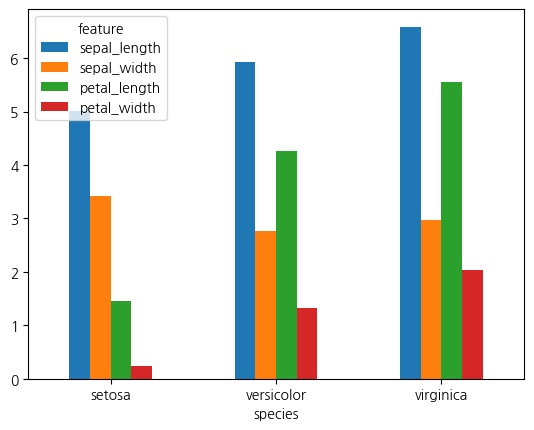

In [20]:
df2.plot.bar(rot =0)

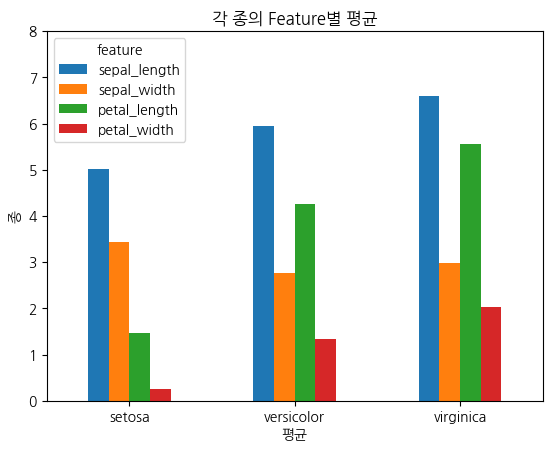

In [34]:
df2.plot.bar(rot=0)
plt.title("각 종의 Feature별 평균")
plt.xlabel("평균")
plt.ylabel("종")
plt.ylim(0, 8)
plt.show()

전치연산으로 시각화 방법을 다르게 할 수도 있다.



In [22]:
df2.T

species,setosa,versicolor,virginica
feature,,,
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


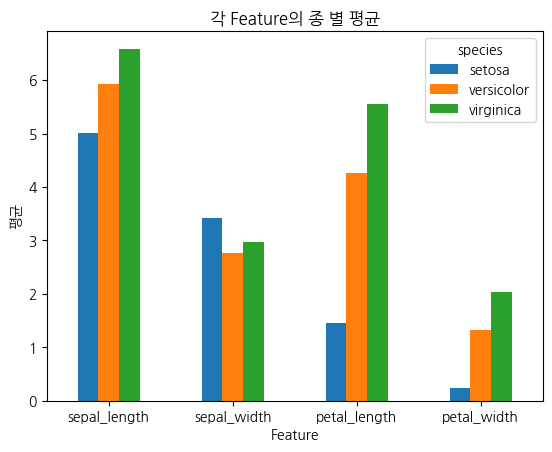

In [23]:
df2.T.plot.bar(rot=0)
plt.title("각 Feature의 종 별 평균")
plt.xlabel("Feature")
plt.ylabel("평균")
plt.show()

다음은 pie, hist, kde, box, scatter 플롯 예제이다.



In [24]:
df3 = titanic.pclass.value_counts()
df3

pclass
3    491
1    216
2    184
Name: count, dtype: int64

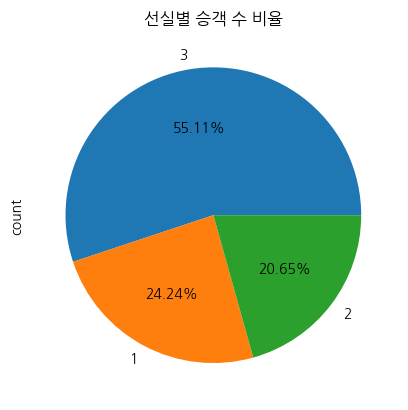

In [26]:
df3 = titanic.pclass.value_counts()
df3.plot.pie(autopct='%.2f%%')
plt.title("선실별 승객 수 비율")
# plt.axis('equal')
plt.show()

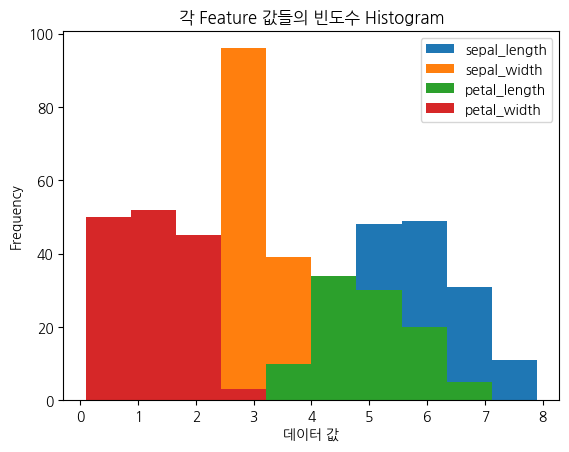

In [27]:
iris.plot.hist()
plt.title("각 Feature 값들의 빈도수 Histogram")
plt.xlabel("데이터 값")
plt.show()

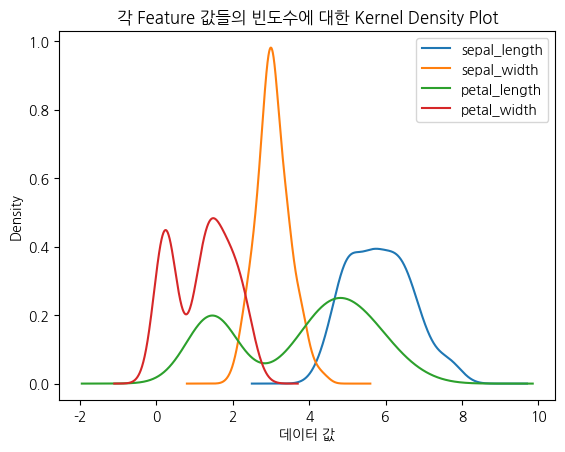

In [28]:
iris.plot.kde()
plt.title("각 Feature 값들의 빈도수에 대한 Kernel Density Plot")
plt.xlabel("데이터 값")
plt.show()

In [38]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


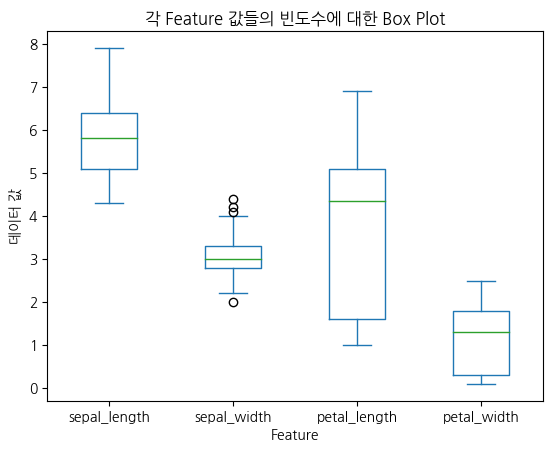

In [29]:
iris.plot.box()
plt.title("각 Feature 값들의 빈도수에 대한 Box Plot")
plt.xlabel("Feature")
plt.ylabel("데이터 값")
plt.show()

박스플롯에 대해서는 추가적인 기능을 가진 boxplot 명령이 별도로 있다.



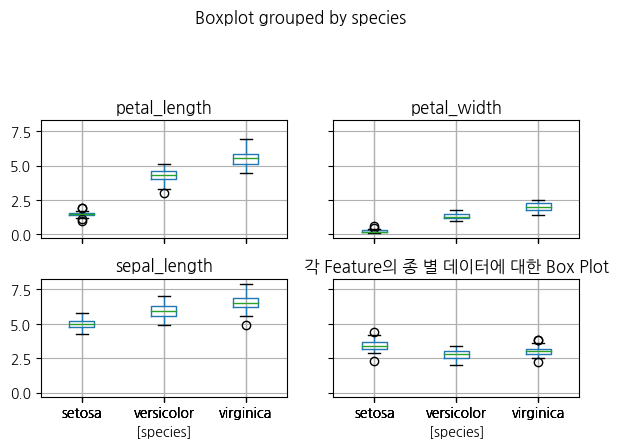

In [36]:
iris.boxplot(by='species')
plt.tight_layout(pad=3, h_pad=1)
plt.title("각 Feature의 종 별 데이터에 대한 Box Plot")
plt.show()

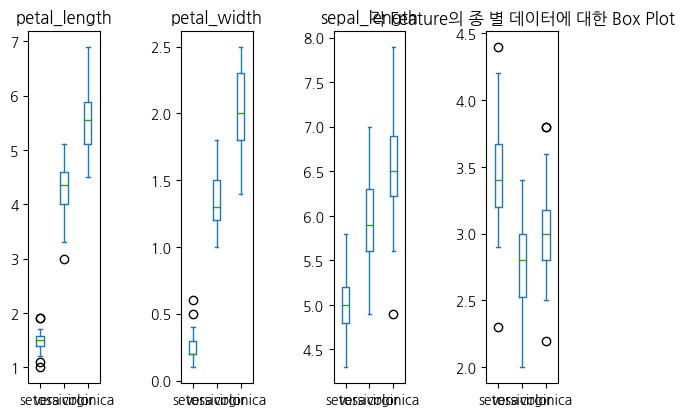

In [31]:
iris.plot.box(by='species')
plt.tight_layout(pad=3, h_pad=1)
plt.title("각 Feature의 종 별 데이터에 대한 Box Plot")
plt.show()